In [1438]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Libraries and functions

In [126]:
import numpy as np
import pandas as pd
import pandasql as ps
from pandas import Series, DataFrame
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import time
import math
from os.path import join, normpath

downloads = 'C:/Users/balob/Downloads'

In [135]:
file_path = normpath(join(downloads,'test (24).csv'))
print(normpath(file_path))

C:\Users\balob\Downloads\test (24).csv


#### To get the path

In [2]:
from pathlib import Path
Path.cwd()

WindowsPath('C:/Users/balob/Documents/GITLAB/RB_BD')

In [336]:
%reset -f

# Examples

### Fetch data from MS SQL DB

In [1439]:
#Из базы данных OCS выгружаем TADIG

import pandas as pd
import pyodbc 
#Connect to OCSDBREP1 (BSS)
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER=172.18.11.82;DATABASE=10028;UID=BSS;PWD=iKQVm40AZAmyRaw72LeY')

sql_srt=\
'''
SELECT DISTINCT mcc.mcc,c.country_name FROM RDB_NETWORK_IMSI_PREFIXES mcc
LEFT JOIN RDB_NETWORKS net
ON mcc.NETWORK_ID=net.NETWORK_ID
LEFT JOIN RDB_COUNTRIES c
ON c.country_id=net.country_id
'''

df_tadig = pd.read_sql_query(sql_srt, cnxn)
#df_tadig['TADIG_CODE_ID']=df_tadig['TADIG_CODE_ID'].astype('int')
#df_tadig['NETWORK_ID']=df_tadig['NETWORK_ID'].astype('int')
cnxn.close()

### Fetch data from Maria DB

In [ ]:
import mysql.connector #pip install mysql-connector-python-rf
import pandas as pd

cnxn = mysql.connector.connect(user='noc', password='WcQUzkXiXwoxnFfGnRxb',host='172.18.11.40',database='BSS')

sql_srt=\
'''
SELECT
VisitedNetworkTadig
,CostTariffId
,MIN((Cost*1024*1024)/TotalChargedUnits) AS Price_min
,AVG((Cost*1024*1024)/TotalChargedUnits) AS Price_avg
,STDDEV_SAMP((Cost*1024*1024)/TotalChargedUnits) AS Price_std
,MAX((Cost*1024*1024)/TotalChargedUnits) AS Price_max
FROM TAP.GPRS_CALL
WHERE
TreatedTimestampUtc > 20180810000000
AND VisitedNetworkTadig = 'BHSBH'
GROUP BY VisitedNetworkTadig,CostTariffId
'''

df_mariadb = pd.read_sql_query(sql_srt, cnxn)

cnxn.close()
df_mariadb.head()

### Soap API

In [ ]:
%reset -f
from zeep import Client
from zeep.wsse.username import UsernameToken

connect = 'lab' #'prod' or 'lab'

if connect == 'lab':
    user = 'lab_api@roamability.com'
    password = 'E10ADC3949BA59ABBE56E057F20F883E' #Lab
    #api_link = 'http://172.20.39.7:8585/ocsapi/roamability/api/roamability.wsdl' #Lab
    api_link = 'https://labocsapi.roamability.com:6443/ocsapi/roamability/api/roamability.wsdl'
elif connect == 'prod':
    user = 'prod_api@roamability.com'
    password = '25D55AD283AA400AF464C76D713C07AD'
    api_link = 'http:y//172.20.35.12:8585/ocsapi/roamability/api/roamability.wsdl'

user_name_token = UsernameToken(user, password)
user_name_token.use_digest = True
client = Client(api_link, wsse=user_name_token)

reseller = client.service.getResellerInfo()
accounts = client.service.getAccounts()

if reseller.result.code == '1':
    print('You are connected to Reseller: {}.\
    \nAvailable credit for the Reseller: {:.0f} USD.\n'.\
    format(reseller.reseller.resellerName,reseller.reseller.availableCredit))
else:
    print('Error in getting Reseller info: {}'.format(reseller.result.description))

if accounts.result.code == '1':
    accounts_dict = {account.accountId:account.accountName for account in accounts.accounts.accounts}
    print('The Reseller contains the following accounts:')
    for i,[account_id,account_name] in enumerate(accounts_dict.items()):
        print(' {:<5}{} (accountID: {})'.format(i,account_name,account_id))
else:
    print('Error in getting Account info: {}'.format(accounts.result.description))

 ### Format output

In [ ]:
import datetime as dt
print( 'start: {} {} :end'.format('one', 'two') ) #start: one two :end
print( 'start: {1} {0} :end'.format('one', 'two') ) #start: two one :end
print( 'start: test {:10} :end'.format('test') ) #start: test test       :end
print( 'start: test {:10} :end'.format(10) ) #start: test         10 :end
print( 'start: test {:>10} :end'.format('test') ) #start: test       test :end
print( 'start: test {:<10} :end'.format('test') ) #start: test test       :end
print( 'start: test {:_<10} :end'.format('test') ) #start: test test______ :end
print( 'start: test {:^10} :end'.format('test') ) #start: test    test    :end
print( 'start: test {:.10} :end'.format('test1test2test3') ) #start: test test1test2 :end
print( 'start: test {:_^10.5} :end'.format('test1test2test3') ) #start: test __test1___ :end
print( 'start: test {:d} :end'.format(42) ) #start: test 42 :end
print( 'start: test {:f} :end'.format(42) ) #start: test 42.000000 :end
print( 'start: test {:06.2f} :end'.format(3.141592) ) #start: test 003.14 :end
print( 'start: test {p[first]} {p[last]} :end'.format(p={'first': 'Jean-Luc', 'last': 'Picard'}) ) #start: test Jean-Luc Picard :end
print( 'start: test {p[4]} {p[5]} :end'.format(p=[4, 8, 15, 16, 23, 42]) ) #start: test 23 42 :end
print( 'start: test {:%Y-%m-%d %H:%M} :end'.format(dt.datetime(2001, 2, 3, 4, 5)) ) #start: test 2001-02-03 04:05 :end

### DataFrame examples

In [ ]:
#DataFrame
df=DataFrame(np.arange(200,212).reshape((3,4)) ,columns=list('abcd'),index=pd.date_range(start='1/1/2000 00:00:00',periods=3,freq='1H'))
df=DataFrame(np.arange(200,212).reshape((3,4)) ,columns=list('abcd'))
df=DataFrame(np.arange(200,212).reshape((3,4)) ,columns=list('abcd'),index=['Utah','Ohio','Texas'])

### Read csv example

In [ ]:
#Read CSV
df_tadig = pd.read_csv('TADIG.csv',sep=';',header=None,dtype={'MCC':object,'MNC':object},
                   names=['TADIG','MCC','MNC'],skiprows=0)

### Groupby examples

In [1443]:
#Вариант №1
#Группировка с применением различных типов агрегации к колонкам groupby().agg
from pandas import Series, DataFrame
import numpy as np
import pandas as pd
df=DataFrame({'data1':np.random.randint(0,10,size=20),'data2':np.random.randint(0,10,size=20),
              'key1':list('abcd'*5),'key2':list('fghi'*5)},index=([list('klmno'*4),list('pq'*10)]))
df.index.names=['ind1','ind2']
df.columns.names=['col_info']
df.groupby(['key1']).agg({'data1': np.mean, 'data2': np.size}) #Агрегация по одной колонке (вариант 1 задания группировки)
df.groupby(df['key1']).agg({'data1': np.mean, 'data2': np.size}) #Агрегация по одной колонке (вариант 2 задания группировки)
df.groupby(df['key1']).agg({'data1': [np.min,np.mean,np.max,np.size], 'data2': [np.min,np.mean,np.max,np.size]}) #Агрегация для каждого поля несколько функций
df.groupby(df['key1']).agg({'data1': [('f_min',np.min),('f_max',np.max)],'data2': [('f_min',np.min),('f_max',np.max)]}) #Агрегация для каждого поля несколько функций с переименованием
df.groupby(['key1','key2']).agg({'data1': np.mean, 'data2': np.size}) #Агрегация по нескольким колонкам
df.groupby(level=0).agg({'data1': np.mean, 'data2': np.size}) #Агрегация по одному индексу (вариант 1 указания индекса)
df.groupby(level='ind1').agg({'data1': np.mean, 'data2': np.size}) #Агрегация по одному индексу (вариант 2 указания индекса)
df.groupby(level=[0,1]).agg({'data1': np.mean, 'data2': np.size}) #Агрегация по нескольким индексам
df[['data1','data2']].groupby(level=[0,1]).agg(['min','max']) #Агрегация для каждого поля несколько функций
df[['data1','data2']].groupby(level=[0,1]).agg([('fmin','min'),('fmax','max')]) #Агрегация для каждого поля несколько функций с переименованием
()

()

In [1442]:
#Вариант №3
#Группировка .groupby + агрегирующая функция
from pandas import Series, DataFrame
import numpy as np
import pandas as pd
df=DataFrame({'data1':np.random.randint(0,10,size=20),'data2':np.random.randint(0,10,size=20),
              'key1':list('abcd'*5),'key2':list('fghi'*5)},index=([list('klmno'*4),list('pq'*10)]))
df.index.names=['ind1','ind2']
df.columns.names=['col_info']

# The Best Practice
df.groupby(['key1'],as_index=False)['data1'].max()
df.groupby(level=0)['data1'].max().reset_index()

df['data1'].groupby(df['key1']).mean() #Агрегация одного поля по одному ключу
df.groupby(df['key1']).mean() #Агрегация всех полей по одному ключу
df[['data1','data2']].groupby(df['key1']).mean() #Агрегация нескольких полей по одному ключу
df[['data1','data2']].groupby([df['key1'],df['key2']]).mean() #Агрегация нескольких полей по нескольким ключам
df[['data1','data2']].groupby(level=0).mean() #Агрегация по одному индексу (вариант 1 указания индекса)
df[['data1','data2']].groupby(level='ind1').mean() #Агрегация по одному индексу (вариант 2 указания индекса)
df[['data1','data2']].groupby(level=[0,1]).mean() #Агрегация по нескольким индексам
df[['data1','data2']].groupby(level=0,axis=1).mean() #Агрегация с группировкой по столбцам
#или
grouped=df['data1'].groupby(df['key1'])
grouped.mean()
#или
df.groupby(df['key1'])['data1'].mean()
#Чтобы добавить префикс к названию строки/столбца
#df['data1'].groupby(df['key1']).mean().add_prefix('mean_')
#df[['data1','data2']].groupby(level=0,axis=1).mean()
df['data1_mean']=df.groupby('key1')['data1'].transform(np.max)
()

()

### Search in Allowed Lists and others

In [54]:
#Like expression for Allowed List
df_al=pd.read_csv(join(downloads,'DMI.dmi_allowed_list_export_Thu_Oct_18_2018.csv'))
#df_al_lab=pd.read_csv('LAB_DMI.dmi_allowed_list_export_Wed_Oct_03_2018.csv')

#df_dmi_diam_oper=pd.read_csv(join(download,''))
df_np=pd.read_csv(join(downloads,'DMI.dmi_netpfx_export_Thu_Aug_23_2018.csv'))
#df_did=pd.read_csv('HRR.hrr_did_export_Wed_Aug_08_2018.csv')
#f_tap_ocs=pd.read_csv('tap_ocs_analysis_180817.csv')

In [73]:
#df_al[(df_al['PLMN code'].str.startswith('MKDCC', na=False)) & (df_al['Sponsor']=='')]
df_al[(df_al['PLMN code'].str.startswith('BELKO', na=False)) & (df_al['Sponsor'].str.contains('sky', na=False))]

,Sponsor,PLMN code,MO,MT,SMS,Data,MO.1,sec,Data.1,kb
583,P4_mon-sky,BELKO,1,1,0,1,1,1,NaN,NaN


In [1446]:
str(df_np[df_np.Operator == ''].Prefix.unique().tolist())
df_np[(df_np.Operator.str.startswith('IRNpp',na=False))&(df_np.SSN==7)]

,Operator,Prefix,Number/Range,SSN,MCC,MNC


In [60]:
df_np[(df_np.Prefix.str.startswith('8497',na=False))]

,Operator,Prefix,Number/Range,SSN,MCC,MNC
539,VNMVT,84970,1,7,452,8
3791,VNMVT,84970,1,149,452,8
3792,KHMVC,84970085597,1,7,456,8
3793,KHMVC,84970085597,1,149,456,8
8913,PERVT,8497005193,1,7,716,15
9711,PERVT,8497005193,1,149,716,15
11582,PERVT,84970051930,0,1,716,15
11944,HRR-VIETNAM,8497,1,2,0,0


In [1144]:
df_dmi_diam_oper[(df_dmi_diam_oper['DMI Operator'].str.startswith('', na=False))\
                 & (df_dmi_diam_oper['Realm'].str.contains('405', na=False))]

,DMI Operator,Realm,Supp-Feat,APN QCI,QOS Priority


### Search in ALARMS by folder names

In [98]:
import os
path = 'c:/W_DATA_ROAM/ALARMS/'
#path = c:\W_DATA_ROAM\ДОКУМЕНТАЦИЯ\NOC_HOW_IT_WORKS\
names = os.listdir(path)
[path + name for name in names if name.find('KOR')!=-1]

['c:/W_DATA_ROAM/ALARMS/MTC_KORKF_STI_#1963561_181014_PRN_MAP_ver2_with_GMSC',
 'c:/W_DATA_ROAM/ALARMS/MTC_Telzar_KORKF_#1868670_180901_PRN_MAP_ver2_with_GMSC']

### Search in files by Tags

In [163]:
import os
from os.path import isfile, isdir, join, normpath

paths = ['c:/W_DATA_ROAM/ДОКУМЕНТАЦИЯ/NOC_HOW_IT_WORKS/',
        'c:/W_DATA_ROAM/МЕТОДИКИ/']

# Если хотя бы один из тэгов присутствует. Нужно указать хотя бы один.
any_tags  =['#gy_principle_of_operation',
            '#data_principle_of_operation']
# Если все теги присутствуют. Можно указать [] если нет обязательных тэгов.
all_tags = []

def find_txt_files_and_folders(path_name):
    file_names_all = os.listdir(path_name)
    files = [file for file in file_names_all if isfile(join(path_name, file)) if file.find('.txt')!=-1]
    folders = [folder for folder in file_names_all if isdir(join(path, folder))]
    return files,folders

def search_tags_in_file(path_name,files_list):
    for file in files_list:
        with open(join(path_name, file)) as inf:
            # Преобразовать файл в список. В качествер разделителя пробел. read читает весь файл.
            words_in_file = inf.read().lower().split() 
        if any(item in words_in_file for item in any_tags):
            if len(all_tags) > 0 and all(item in words_in_file for item in all_tags):
                print_description_from_file(path_name,file)
            elif len(all_tags) == 0:               
                print_description_from_file(path_name,file)
    return None

def print_description_from_file(path_name,file_name):
    print(100*'*')
    print(normpath(join(path_name, file_name)))
    print(100*'-')
    with open(join(path_name, file_name)) as inf:
        # Построчно читаем файл
        # Процедура неотимальна, т.к. будет прочитан весь файл до конца
        for line in inf:
            line.strip()
            if '<DESCRIPTION>' in line:
                for line in inf:
                    line.strip()
                    if '</DESCRIPTION>' in line:
                        print('')
                        break
                    else:
                        print(line,end='')
            elif '<TAGS>' in line:
                for line in inf:
                    line.strip()
                    if '</TAGS>' in line:
                        print(30*'-')
                        break
                    else:
                        print(line,end='')
    return None

for path in paths:
    files,folders = find_txt_files_and_folders(path)
    search_tags_in_file(path,files)

    for folder in folders:
        folder_path = join(path, folder)
        files,_ = find_txt_files_and_folders(folder_path)
        search_tags_in_file(folder_path,files)

****************************************************************************************************
c:\W_DATA_ROAM\ДОКУМЕНТАЦИЯ\NOC_HOW_IT_WORKS\P4_GTP_U_Proxy_Feature\readme.txt
----------------------------------------------------------------------------------------------------
#data_principle_of_operation
------------------------------
Функциональност GTP-u proxy от P4

****************************************************************************************************
c:\W_DATA_ROAM\ДОКУМЕНТАЦИЯ\NOC_HOW_IT_WORKS\PS_General_description\_TEMPLATE.txt
----------------------------------------------------------------------------------------------------
#data_principle_of_operation
------------------------------
LTE attach procedure
(http://www.lteandbeyond.com/2012/01/lte-attach-procedure.html)
Рекомендация 3GPP TS 23.401
https://www.etsi.org/deliver/etsi_ts/123400_123499/123401/15.05.00_60/ts_123401v150500p.pdf
(стр.123)



### Hex to Dec conversion

In [118]:
int('f91e',16)
hex(11025)
int('2911',16)

10513

### Pricing counting

In [361]:
moc=0.144
mtc=0
text=0.19
data=0.0672749999999999

tariff=[moc,mtc,text,data]

print("Price P4")
for k,v in {'1.2':1.2,'1.2*1.5':1.2*1.5,'1.2*1.5*1.15':1.2*1.5*1.15,'1.2*1.5*1.30':1.2*1.5*1.30,'2':1.2*2}.items():
    print("Price {:<15}:".format(k),[round(i*v,6) for i in tariff])
print("\nPrice Partner")
for k,v in {'1.5':1.5,'1.5*1.15':1.5*1.15,'1.5*1.30':1.5*1.30,'2':2}.items():
    print("Price {:<15}:".format(k),[round(i*v,6) for i in tariff])

Price P4
Price 1.2            : [0.1728, 0.0, 0.228, 0.08073]
Price 1.2*1.5        : [0.2592, 0.0, 0.342, 0.121095]
Price 1.2*1.5*1.15   : [0.29808, 0.0, 0.3933, 0.139259]
Price 1.2*1.5*1.30   : [0.33696, 0.0, 0.4446, 0.157423]
Price 2              : [0.3456, 0.0, 0.456, 0.16146]

Price Partner
Price 1.5            : [0.216, 0.0, 0.285, 0.100912]
Price 1.5*1.15       : [0.2484, 0.0, 0.32775, 0.116049]
Price 1.5*1.30       : [0.2808, 0.0, 0.3705, 0.131186]
Price 2              : [0.288, 0, 0.38, 0.13455]


## Testing

In [573]:
import mglearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import numpy as np
import pandas as pd
from pandas import DataFrame,Series

In [42]:
files = ['ROAMABILITY Platinum 1530_Oct-01-2018 103940900.csv.done',
     'ROAMABILITY Platinum 1902_Oct-03-2018 104206180.csv.done',
     'ROAMABILITY Platinum 1530_Oct-04-2018 104335060.csv.done']
for i,file in enumerate(files):
    name = 'df_'+str(i)
    vars()[name] = pd.read_csv(file)
    print(name)
    display(vars()[name][vars()[name]['Dial Code']==95979])

df_0


,Location Name,Platinum $ USD,Status,Effective Date,Dial Code
100,Myanmar (Burma) Cellular-Telenor,0.123,Decrease,"October 1, 2018 03:34 PM",95979


df_1


,Location Name,Platinum $ USD,Status,Effective Date,Dial Code
35925,Myanmar (Burma) Cellular-Telenor,0.1281,Increase,"October 10, 2018 12:00 AM",95979


df_2


,Location Name,Platinum $ USD,Status,Effective Date,Dial Code
14,Myanmar (Burma) Cellular-Telenor,0.121,Decrease,"October 4, 2018 03:35 PM",95979


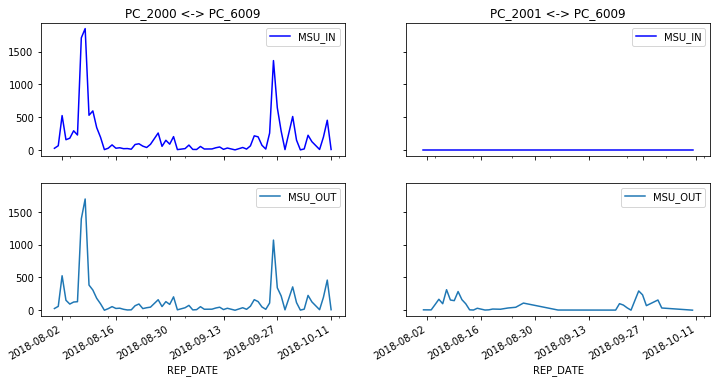

In [3]:
df = pd.read_csv('test (22).csv',index_col ='REP_DATE',parse_dates=True)[:100]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6),sharex=True,sharey=True)
df.loc[df.OPC == 2000,['MSU_IN']].plot(ax=axes[0,0],c='b')
df.loc[df.OPC == 2000,['MSU_OUT']].plot(ax=axes[1,0])
axes[0,0].set_title('PC_2000 <-> PC_6009')
df.loc[df.OPC == 2001,['MSU_IN']].plot(ax=axes[0,1],c='b')
df.loc[df.OPC == 2001,['MSU_OUT']].plot(ax=axes[1,1])
axes[0,1].set_title('PC_2001 <-> PC_6009')
plt.show()

In [46]:
390/67

5.82089552238806

In [91]:
import paramiko
print_lines = 10
host = '172.19.11.191'
user = 'pavel'
secret = 'RzAZPjMjvujCPjU88bpevQp'
file_path_name = '/home/tracer/LOG/stat_GrayLog.log'
port = 22
client = paramiko.SSHClient()
client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
client.connect(hostname=host, username=user, password=secret, port=port)
sftp_client = client.open_sftp()
remote_file = sftp_client.open(file_path_name)
try:
    #for line in remote_file:
    for i,line in enumerate(reversed(list(remote_file))):
        if i < print_lines:
            print(i,line,end='')
        else:
            break
finally:
    remote_file.close()
client.close()
# (https://stackoverflow.com/questions/1596963/read-a-file-from-server-with-ssh-using-python)

0 2018-10-19 05:00:41,430 - ss7_stat - INFO - rep_ss7_sqlite_db_py2. End. Total elapsed time 0:00:39.753978
1 2018-10-19 05:00:41,430 - ss7_stat - INFO - Commiting all the data into DB.
2 2018-10-19 05:00:41,430 - ss7_stat - INFO - Collecting diameter data. End. Elapsed time 0:00:01.603603
3 2018-10-19 05:00:39,826 - ss7_stat - INFO - Start. Collecting diameter data from Graylog.
4 2018-10-19 05:00:39,826 - ss7_stat - INFO - Collecting ss7 data. End. Elapsed time 0:00:38.149681
5 2018-10-19 05:00:01,682 - ss7_stat - INFO - Start. Collecting ss7 data from Graylog.
6 2018-10-19 05:00:01,681 - ss7_stat - INFO - Connecting to SQlite DB: /opt/sqlite/nsstat.sqlite
7 2018-10-19 05:00:01,680 - ss7_stat - INFO - rep_ss7_sqlite_db_py2. Start. Programm version: 0.0.3
8 2018-10-18 05:00:33,592 - ss7_stat - INFO - rep_ss7_sqlite_db_py2. End. Total elapsed time 0:00:31.652883
9 2018-10-18 05:00:33,592 - ss7_stat - INFO - Commiting all the data into DB.


In [80]:
from tqdm import tqdm
import time
for i in tqdm(range(10)):
    time.sleep(1)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:10<00:00,  1.00s/it]


In [130]:
file_usage = join(downloads,'VOIP_USAGE_REP.csv')
file_usage

'C:/Users/balob/Downloads\\VOIP_USAGE_REP.csv'

In [162]:
import os
from os.path import isfile, isdir, join, normpath

paths = ['c:/W_DATA_ROAM/ДОКУМЕНТАЦИЯ/NOC_HOW_IT_WORKS/',
        'c:/W_DATA_ROAM/МЕТОДИКИ/']

# Если хотя бы один из тэгов присутствует. Нужно указать хотя бы один.
any_tags  =['#gy_principle_of_operation',
            '#data_principle_of_operation',
           '#ocs_principle_of_operation']
# Если все теги присутствуют. Можно указать [] если нет обязательных тэгов.
all_tags = []

def find_txt_files_and_folders(path_name):
    file_names_all = os.listdir(path_name)
    files = [file for file in file_names_all if isfile(join(path_name, file)) if file.find('.txt')!=-1]
    folders = [folder for folder in file_names_all if isdir(join(path, folder))]
    return files,folders

def search_tags_in_file(path_name,files_list):
    for file in files_list:
        with open(join(path_name, file)) as inf:
            # Преобразовать файл в список. В качествер разделителя пробел. read читает весь файл.
            words_in_file = inf.read().lower().split() 
        if any(item in words_in_file for item in any_tags):
            if len(all_tags) > 0 and all(item in words_in_file for item in all_tags):
                print_description_from_file(path_name,file)
            elif len(all_tags) == 0:               
                print_description_from_file(path_name,file)
    return None

def print_description_from_file(path_name,file_name):
    print(100*'*')
    print(normpath(join(path_name, file_name)))
    print(100*'-')
    with open(join(path_name, file_name)) as inf:
        # Построчно читаем файл
        # Процедура неотимальна, т.к. будет прочитан весь файл до конца
        for line in inf:
            line.strip()
            if '<DESCRIPTION>' in line:
                for line in inf:
                    line.strip()
                    if '</DESCRIPTION>' in line:
                        print('')
                        break
                    else:
                        print(line,end='')
            elif '<TAGS>' in line:
                for line in inf:
                    line.strip()
                    if '</TAGS>' in line:
                        print(30*'-')
                        break
                    else:
                        print(line,end='')
    return None

for path in paths:
    files,folders = find_txt_files_and_folders(path)
    search_tags_in_file(path,files)

    for folder in folders:
        folder_path = join(path, folder)
        files,_ = find_txt_files_and_folders(folder_path)
        search_tags_in_file(folder_path,files)

****************************************************************************************************
c:\W_DATA_ROAM\ДОКУМЕНТАЦИЯ\NOC_HOW_IT_WORKS\CAMEL_Relay.txt
----------------------------------------------------------------------------------------------------
****************************************************************************************************
c:\W_DATA_ROAM\ДОКУМЕНТАЦИЯ\NOC_HOW_IT_WORKS\Http_module.txt
----------------------------------------------------------------------------------------------------
#http_principle_of_operation
#ocs_principle_of_operation
------------------------------
Http module не надо рестартовать, чтобы изменения в файле вступили в силу.
"Для добавления Update_Location_Relay:
1. Сконфигурировать Peer в HttpModule [на обоих OCS]
/home/roamability/config/HttpModule/routing.xml
перезапуск сервиса не требуется
2. Поставить галку "Relay LU" в Reseller"
(Владимир В., 15.10.2018, WA)

******************************************************************

In [1451]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [122]:
%reset -f